# Cloning YOLOv5

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repository
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16625, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 16625 (delta 58), reused 65 (delta 30), pack-reused 16522
Receiving objects: 100% (16625/16625), 15.10 MiB | 31.11 MiB/s, done.
Resolving deltas: 100% (11417/11417), done.
/kaggle/working/yolov5


### Installing requirements

In [2]:
%pip install -r requirements.txt  # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is 

In [3]:
 %pip install -qr requirements.txt  # install dependencies

Note: you may need to restart the kernel to use updated packages.


## Roboflow

In [4]:
 %pip install -q roboflow  # install dependencies

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is i

In [5]:
import torch
import os
from IPython.display import Image, clear_output

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key='oQC6pr6EgG7MZzH3Pgm8',model_format='yolov5',notebook='ultralytics')

In [7]:
os.makedirs('/kaggle/working/dataset_directory')

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oQC6pr6EgG7MZzH3Pgm8")
project = rf.workspace("destiny2104007").project("brain_tumor-qglxb")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain_tumor-1 in yolov5pytorch:: 100%|██████████| 6140/6140 [00:00<00:00, 8778.65it/s]


In [10]:
!python train.py --img 512 --batch 16 --epochs 50 --data /kaggle/working/yolov5/Brain_tumor-1/data.yaml --cfg ./models/yolov5s.yaml --weights /kaggle/input/yolov5s/yolov5s.pt --name my_model

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-05-28 01:22:32.968649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 01:22:32.968703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 01:22:32.970217: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

### To view tensorboard (only on colab)
%reload_ext tensorboard

%tensorboard --logdir runs

In [11]:
!python val.py --img 512 --data /kaggle/working/yolov5/Brain_tumor-1/data.yaml --weights /kaggle/working/yolov5/runs/train/my_model/weights/best.pt


val: data=/kaggle/working/yolov5/Brain_tumor-1/data.yaml, weights=['/kaggle/working/yolov5/runs/train/my_model/weights/best.pt'], batch_size=32, imgsz=512, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /kaggle/working/yolov5/Brain_tumor-1/valid/labels.cache... 306 ima
                 Class     Images  Instances          P          R      mAP50   
                   all        306        307      0.804      0.697      0.768      0.418
                     2        306        307      0.804      0.697      0.768      0.418
Speed: 0.1ms pre-process, 3.0ms inference, 2.8ms NMS per 

In [15]:
# Path to the directory containing images you want to run inference on
images_dir = "/kaggle/working/yolov5/Brain_tumor-1/valid/images"

# Path to the trained model weights (use the best weights saved during training)
weights_path = "/kaggle/working/yolov5/runs/train/my_model/weights/best.pt"

# Run inference
!python detect.py --weights {weights_path} --img 512 --conf 0.25 --source {images_dir}

detect: weights=['/kaggle/working/yolov5/runs/train/my_model/weights/best.pt'], source=/kaggle/working/yolov5/Brain_tumor-1/valid/images, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/306 /kaggle/working/yolov5/Brain_tumor-1/valid/images/2452_png.rf.d4a1cc47c6ad9c4f5d43128b401b4db4.jpg: 512x512 (no detections), 5.9ms
image 2/306 /kaggle/working/yolov5/Brain_tumor-1/valid/images/2453_png.rf.3f4f7f97668437fed928d431efb760ef.jpg: 512x512 

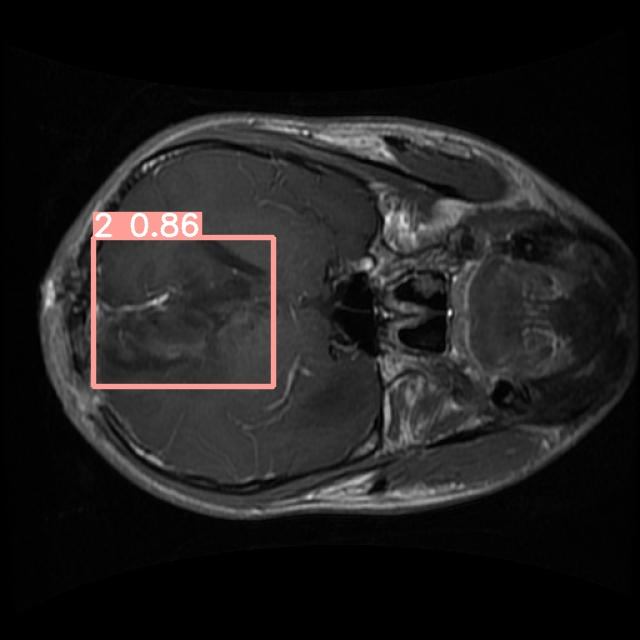

In [17]:
from IPython.display import Image, display

# Path to the image you want to display
image_path = "/kaggle/working/yolov5/runs/detect/exp4/2607_png.rf.fef9593a18ad9e608feb001858f9ed93.jpg"

# Display the image
display(Image(filename=image_path))

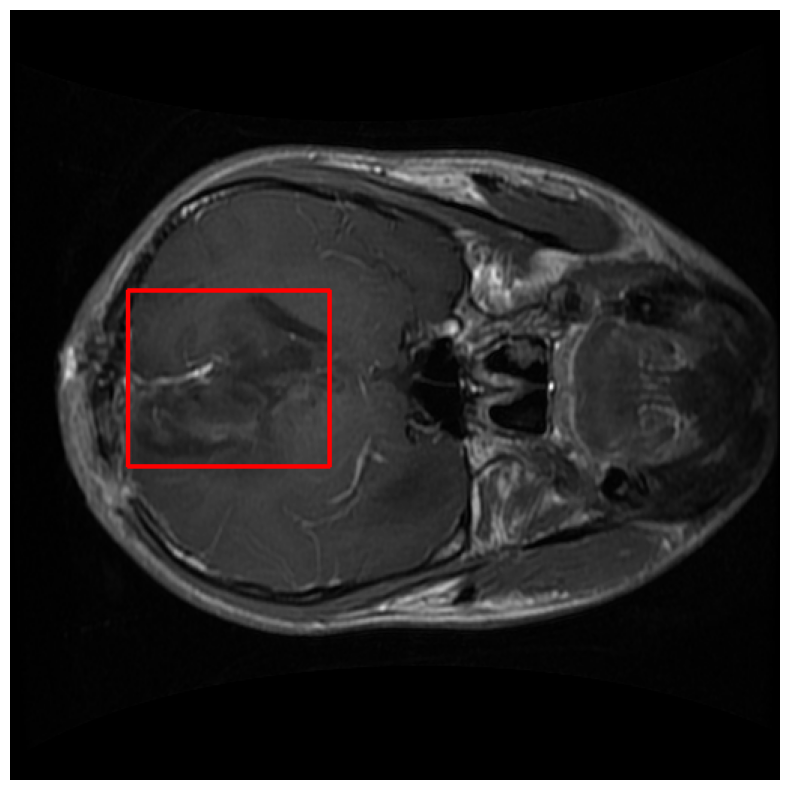

In [18]:
import cv2
import matplotlib.pyplot as plt

# Paths to the image and label file
image_path = "/kaggle/input/brain-tumor-yolo/dataset_brain tumor_correct/Valid/Images/2607.png"
label_path = "/kaggle/input/brain-tumor-yolo/dataset_brain tumor_correct/Valid/Labels/2607.txt"

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Read the label file
with open(label_path, 'r') as file:
    lines = file.readlines()

# Image dimensions
height, width, _ = image.shape

# Draw bounding boxes
for line in lines:
    class_id, x_center, y_center, w, h = map(float, line.strip().split())
    x_center, y_center, w, h = x_center * width, y_center * height, w * width, h * height
    x_min = int(x_center - w / 2)
    y_min = int(y_center - h / 2)
    x_max = int(x_center + w / 2)
    y_max = int(y_center + h / 2)
    
    # Draw rectangle
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Blue color in RGB

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [19]:
import shutil

# Path to the directory you want to zip
directory_path = "/kaggle/working/yolov5/runs/detect/exp4"

# Path for the output zip file
output_zip_path = "/kaggle/working/exp4.zip"

# Create a zip file
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', directory_path)

print(f"Zip file created at: {output_zip_path}")

Zip file created at: /kaggle/working/exp4.zip


In [21]:
import shutil

# Path to the directory you want to zip
directory_path = "/kaggle/working/yolov5/runs/train/my_model"

# Path for the output zip file
output_zip_path = "/kaggle/working/exp_train.zip"

# Create a zip file
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', directory_path)

print(f"Zip file created at: {output_zip_path}")


Zip file created at: /kaggle/working/exp_train.zip
